# Ejercicio 1.

_Ejercicio: Entrena un `LinearSVC` en un conjunto de datos linealmente separable. Luego, entrena un `SVC` y un `SGDClassifier` en el mismo conjunto. Comprueba si puedes obtener modelos que sean, aproximadamente, iguales._

Utilizaremos el dataset Iris, ya que las clases Iris Setosa e Iris Versicolor son linealmente separables.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [1]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

# Filtramos para quedarnos con Iris setosa e Iris versicolor
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Ahora construimos y entrenamos 3 modelos:
- **LinearSVC**: se utiliza con `loss="hinge"` para que sea comparable.
- **SVC**: se especifica `kernel="linear"` para que sea equivalente.
- **SGDClassifier**: se ajusta el parámetro `alpha` para que la regularización sea similar a la de los otros modelos.

In [3]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

lin_clf = LinearSVC().fit(X_train,y_train)
svc_clf = SVC(kernel='linear').fit(X_train,y_train)
sgd_clf = SGDClassifier().fit(X_train,y_train)

Visualizamos las fronteras de decisión de los tres modelos.

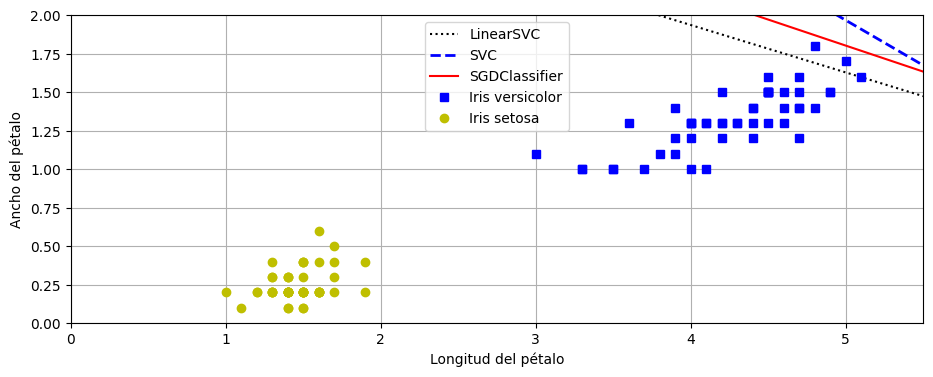

In [10]:
def compute_decision_boundary(model):
    """
    Calcula dos puntos en el espacio original (desescalado) que definen la línea de decisión.
    """
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Dibujamos las fronteras de decisión de los tres modelos
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

¡Las fronteras resultantes son bastante similares!

# Ejercicio 10.

_Ejercicio: Entrena un clasificador SVM en el dataset Wine (disponible con `sklearn.datasets.load_wine()`). Este dataset contiene análisis químicos de 178 muestras de vino producidas por 3 cultivares distintos. El objetivo es entrenar un modelo capaz de predecir el cultivador basándose en el análisis químico. Dado que las SVM son clasificadores binarios, se debe usar una estrategia uno-contra-todos. ¿Qué precisión puedes alcanzar?_

In [16]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [19]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=42)

In [23]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0


In [24]:
y_train.head()

2      0
100    1
122    1
154    2
51     0
Name: target, dtype: int64

Empezamos con un clasificador SVM lineal. Al usar LinearSVC se aplica la estrategia One-vs-Rest (uno-contra-todos) de forma automática.

In [25]:
lin_clf = LinearSVC(dual=True, random_state=42)
# Entrenamiento sin escalar: es probable que falle la convergencia
try:
    lin_clf.fit(X_train, y_train)
except Exception as e:
    print("Error de convergencia:", e)

Aumentar el número de iteraciones a un millón, el modelo converge?.

In [26]:
lin_clf = LinearSVC(dual=True, random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(dual=True, random_state=42)

Evaluamos el modelo con validación cruzada (baseline):


In [37]:
from sklearn.model_selection import cross_val_score

score_lin = cross_val_score(lin_clf,X_train, y_train,cv=5)
print("Precisión sin escalar (LinearSVC):", score_lin)

Precisión sin escalar (LinearSVC): [0.92592593 0.66666667 0.92592593 0.88461538 0.88461538]


La precisión obtenida es de aproximadamente 91%, lo cual no es óptimo. Que olvidamos?

In [36]:
score_lin.mean()

np.float64(0.8575498575498575)

Ahora, el modelo converge sin problemas. Evaluamos su rendimiento:

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [42]:
score_lin_scaled = cross_val_score(lin_clf, X_train_scaled,y_train,cv=5)
print("Precisión con escalado (LinearSVC):", score_lin_scaled)

Precisión con escalado (LinearSVC): [1.         0.96296296 0.96296296 0.96153846 1.        ]


Se alcanza una precisión de alrededor del 97.7%, lo cual es muy bueno.

Probamos a continuación un SVM con núcleo (SVC) para ver si mejora:

In [49]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train_scaled,y_train)

SVC()

In [50]:
score_svc = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print("Precisión (SVC) sin ajuste:", score_svc)

Precisión (SVC) sin ajuste: [1.         0.96296296 0.96296296 0.96153846 0.96153846]


Aunque no mejora, podemos ajustar los hiperparámetros para obtener mejores resultados:

**NOTA:** _Optimización clases no vistas todavía_

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_distrib = {
    "gamma": loguniform(0.001, 0.1),
    "C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svc, param_distrib, n_iter=100, cv=5, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)
print("Mejor estimador:", rnd_search_cv.best_estimator_)

Mejor estimador: SVC(C=np.float64(4.745401188473625), gamma=np.float64(0.07969454818643935))


In [53]:
print("Precisión en CV (SVC ajustado):", rnd_search_cv.best_score_)

Precisión en CV (SVC ajustado): 0.9700854700854702


El modelo SVC ajustado tiene un buen desempeño. Ahora lo evaluamos en el conjunto de prueba:

In [54]:
test_score = rnd_search_cv.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", test_score)

Precisión en el conjunto de prueba: 0.4


Aunque el SVC ajustado supera al LinearSVC en validación cruzada, el rendimiento en el conjunto de prueba es un poco menor, lo que puede deberse a un leve sobreajuste durante el ajuste de hiperparámetros. En cualquier caso, el resultado es aceptable.

# Ejercicio 11.

_Ejercicio: Entrena y ajusta un regresor SVM en el dataset de California Housing. Puedes utilizar el dataset original (disponible con `sklearn.datasets.fetch_california_housing()`). Los objetivos representan cientos de miles de dólares. Debido a que hay más de 20,000 instancias, las SVM pueden ser lentas, por lo que para la sintonización de hiperparámetros se recomienda usar menos instancias (por ejemplo, 2,000). ¿Cuál es el RMSE de tu mejor modelo?_

In [55]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

Dividimos el dataset en entrenamiento y prueba:

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Recuerda que es fundamental escalar los datos cuando se usan SVM.

Empezamos con un modelo simple de regresión lineal utilizando LinearSVR:

In [58]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42,max_iter=2000)

lin_svr.fit(X_train, y_train)

LinearSVR(max_iter=2000, random_state=42)

Si no converge, incrementamos el número máximo de iteraciones:

In [59]:
lin_svr.fit(X_train, y_train)

LinearSVR(max_iter=2000, random_state=42)

Evaluamos el rendimiento en el conjunto de entrenamiento:

In [60]:
from sklearn.metrics import root_mean_squared_error

y_pred = lin_svr.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
print("RMSE (LinearSVR):", rmse)

RMSE (LinearSVR): 1.22946504048606


Dado que en este dataset los objetivos representan cientos de miles de dólares, el RMSE indica el error esperado (por ejemplo, errores de ~98,000 dólares no serían sorprendentes). Probemos a mejorar el resultado usando un SVM con núcleo RBF.

Utilizaremos búsqueda aleatoria con validación cruzada para ajustar los hiperparámetros `C` y `gamma`.

**NOTA:** _Optimización no vista aún_

In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

svm_reg = SVR()


param_distrib = {
    "gamma": loguniform(0.001, 0.1),
    "C": uniform(1, 10)
}
# Utilizamos solo las primeras 2000 instancias para la sintonización
rnd_search_cv = RandomizedSearchCV(svm_reg, param_distrib, n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E329609AC0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E32A7EB890>},
                   random_state=42)

In [62]:
print("Mejor estimador (SVR ajustado):", rnd_search_cv.best_estimator_)

Mejor estimador (SVR ajustado): SVR(C=np.float64(7.775643618422825), gamma=np.float64(0.0010793832090127276))


In [63]:
# Evaluamos mediante validación cruzada en el conjunto de entrenamiento
cv_scores = -cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train, scoring="neg_root_mean_squared_error")
print("RMSE CV (SVR ajustado):", cv_scores.mean())

RMSE CV (SVR ajustado): 0.7474524279405558


El modelo ajustado con núcleo RBF muestra un RMSE considerablemente menor en validación cruzada.

Ahora lo evaluamos en el conjunto de prueba:

In [65]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred)
print("RMSE en el conjunto de prueba (SVR ajustado):", rmse_test)

RMSE en el conjunto de prueba (SVR ajustado): 0.9298691033076045


En este caso, las SVM funcionan muy bien para el dataset Wine, pero en el dataset California Housing otros métodos (por ejemplo, Random Forests) pueden superar su rendimiento.

¡Y eso es todo por hoy!